# Introduction



1.   This dataset gives a number of variables along with a target condition of having or not having heart disease.
2.   We will try to use this data to create a model which tries predict if a patient has this disease or not.





In [104]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
import seaborn as sns
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline

In [35]:
# Other libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Machine Learning
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

t's a clean, easy to understand set of data. However, the meaning of some of the column headers are not obvious. Here's what they mean,

age: The person's age in years

sex: The person's sex (1 = male, 0 = female)

cp: The chest pain experienced (Value 0: typical angina, Value 1: atypical angina, Value 2: non-anginal pain, Value 3: asymptomatic)
trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)

chol: The person's cholesterol measurement in mg/dl

fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

thalach: The person's maximum heart rate achieved

exang: Exercise induced angina (1 = yes; 0 = no)

oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)

slope: the slope of the peak exercise ST segment (Value 1: upsloping, 
Value 2: flat, Value 3: downsloping)

ca: The number of major vessels (0-3)

thal: A blood disorder called thalassemia (1 = normal; 2 = fixed defect; 3 = reversable defect)

target: Heart disease (0 = no, 1 = yes)

In [36]:
df = pd.read_csv("dataset.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


#EDA

In [37]:
categorical_val = []
continous_val = []
for column in df.columns:
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

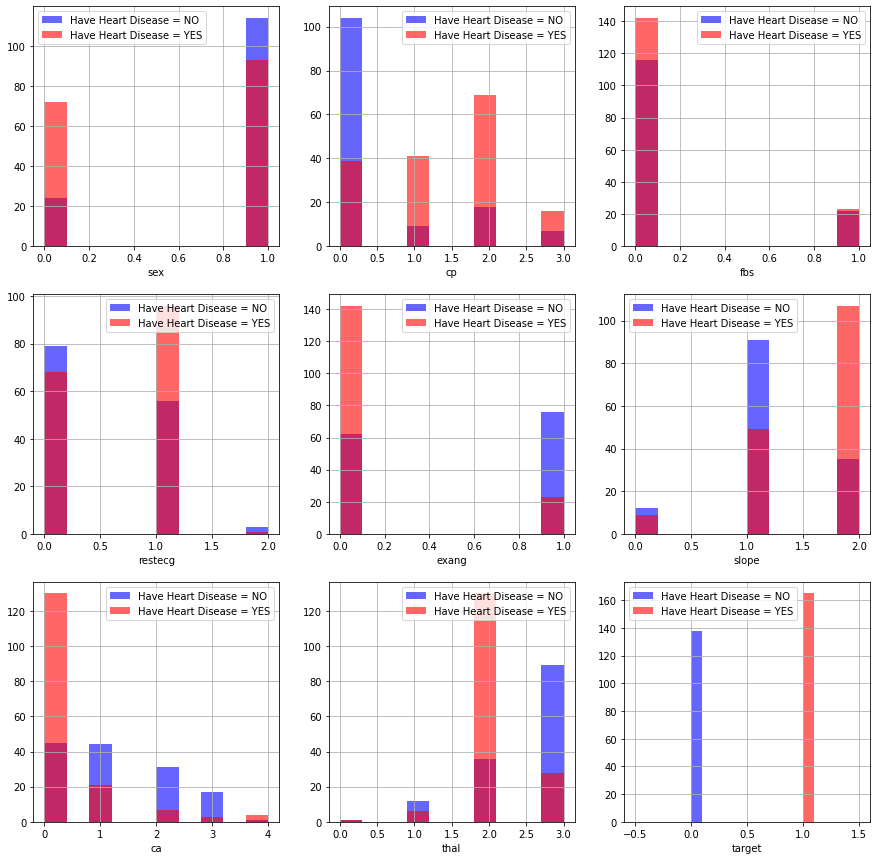

In [38]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(categorical_val, 1):
    plt.subplot(3, 3, i)
    df[df["target"] == 0][column].hist(bins=10, histtype ='bar', color='blue', label='Have Heart Disease = NO', alpha=0.6)
    df[df["target"] == 1][column].hist(bins=10,histtype ='bar', color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

As per the visual data analysis from above plot we get the proper information ragarding to featues with respect to heart disease.


1.   sex = as per th graph women have high rate of heart disease than men
2.   cp,exang = a person whos cheast pain is typical angina have high rate of not having HD on other hand exer Exercise induced angina have high rate HD
3.   fbs,thal = The person's fasting blood sugar is greater than 120mg/dl and blood disorder with fixed defect have very high percentage of HD
4.   



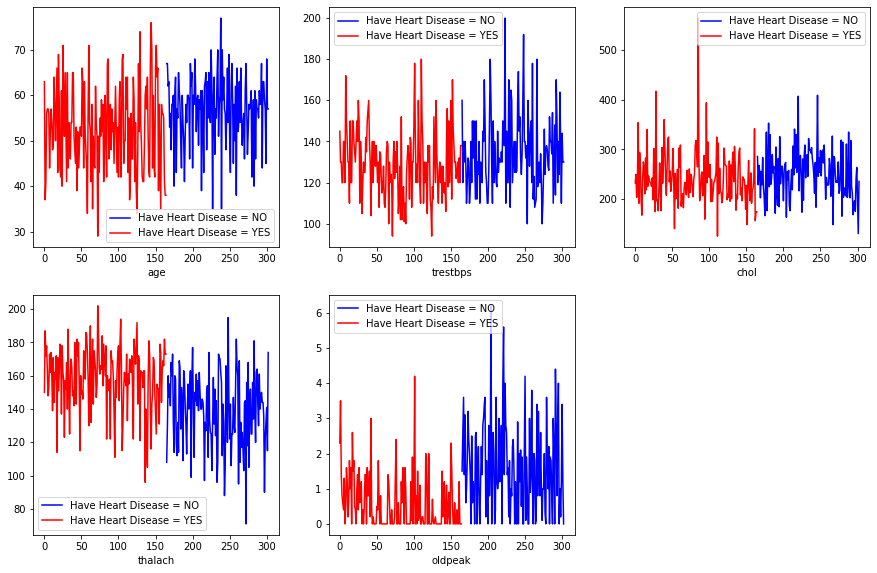

In [39]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(continous_val, 1):
    plt.subplot(3, 3, i)
    df[df["target"] == 0][column].plot( color='blue', label='Have Heart Disease = NO')
    df[df["target"] == 1][column].plot( color='red', label='Have Heart Disease = YES')
    plt.legend()
    plt.xlabel(column)

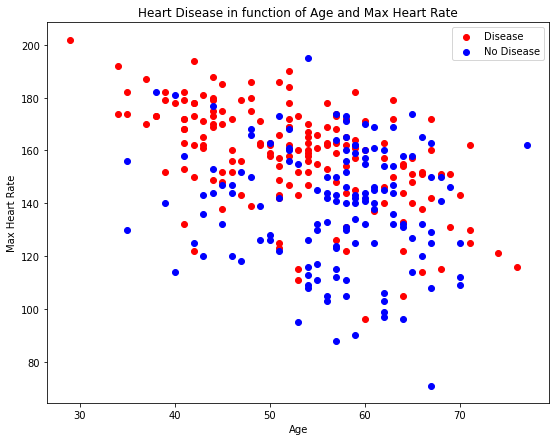

In [40]:
# Create another figure
plt.figure(figsize=(9, 7))

# Scatter with postivie examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="red")

# Scatter with negative examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="blue")

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

In [41]:
import plotly.graph_objects as go
import plotly.express as px
kk = df.loc[(df['target'] == 1) & (df['sex'] == 0 )]
kl = df.loc[(df['target'] == 1) & (df['sex'] == 1 )]

In [42]:
df.describe(include='all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# checking null values 

In [43]:
missing_values = pd.DataFrame(df.isnull().mean()*100)
missing_values

,0
age,0.0
sex,0.0
cp,0.0
trestbps,0.0
chol,0.0
fbs,0.0
restecg,0.0
thalach,0.0
exang,0.0
oldpeak,0.0


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [45]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

#IQR 
removing all outliers from continious value features

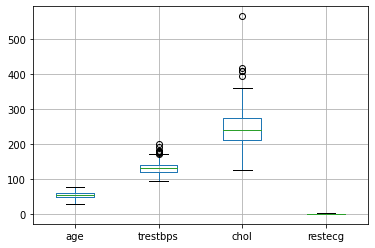

In [46]:
columns = ['age', 'trestbps', 'chol', 'restecg']
df.boxplot(columns)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


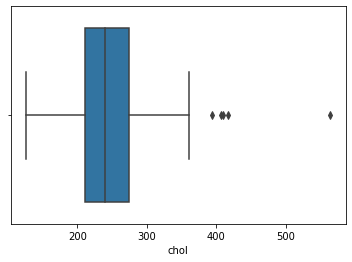

In [47]:
sns.boxplot(df['chol'])

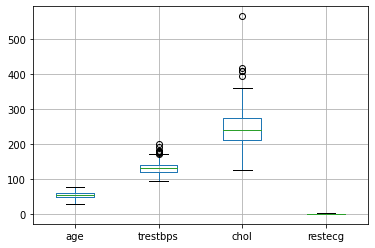

In [48]:
columns = ['age', 'trestbps', 'chol', 'restecg']
df.boxplot(columns)

In [49]:
num_features =['age', 'trestbps', 'chol', 'restecg']

In [50]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)


age         13.5
sex          1.0
cp           2.0
trestbps    20.0
chol        63.5
fbs          0.0
restecg      1.0
thalach     32.5
exang        1.0
oldpeak      1.6
slope        1.0
ca           1.0
thal         1.0
target       1.0
dtype: float64


In [51]:
print((df[num_features] < (Q1 - 1.5 * IQR)) | (df[num_features] > (Q3 + 1.5 * IQR)))

       age     ca   chol     cp  exang    fbs  oldpeak  restecg    sex  slope  \
0    False  False  False  False  False  False    False    False  False  False   
1    False  False  False  False  False  False    False    False  False  False   
2    False  False  False  False  False  False    False    False  False  False   
3    False  False  False  False  False  False    False    False  False  False   
4    False  False  False  False  False  False    False    False  False  False   
..     ...    ...    ...    ...    ...    ...      ...      ...    ...    ...   
298  False  False  False  False  False  False    False    False  False  False   
299  False  False  False  False  False  False    False    False  False  False   
300  False  False  False  False  False  False    False    False  False  False   
301  False  False  False  False  False  False    False    False  False  False   
302  False  False  False  False  False  False    False    False  False  False   

     target   thal  thalach

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """Entry point for launching an IPython kernel.


In [52]:
df[num_features] = df[num_features][~((df[num_features] < (Q1 - 1.5 * IQR)) |(df[num_features] > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """Entry point for launching an IPython kernel.


(303, 14)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


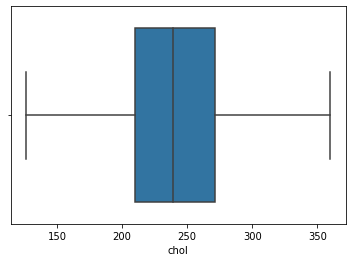

In [53]:
sns.boxplot(df['chol'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


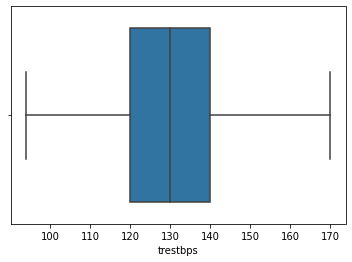

In [54]:
sns.boxplot(df['trestbps'])

In [55]:
#

## Heat map showing correlation between features

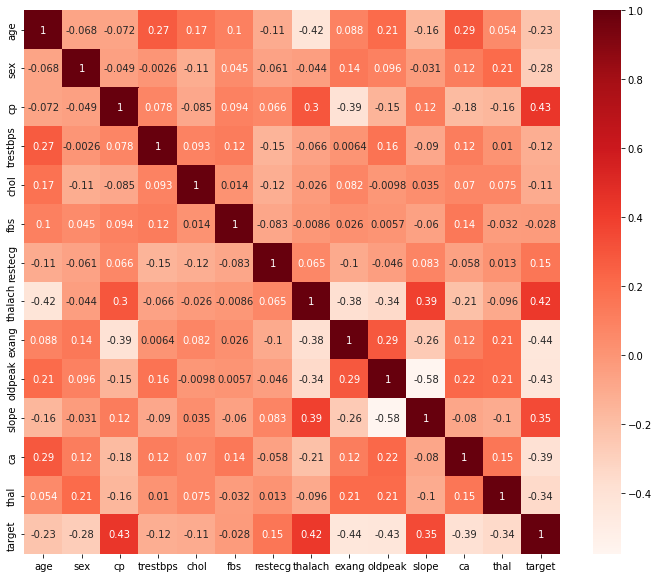

In [56]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

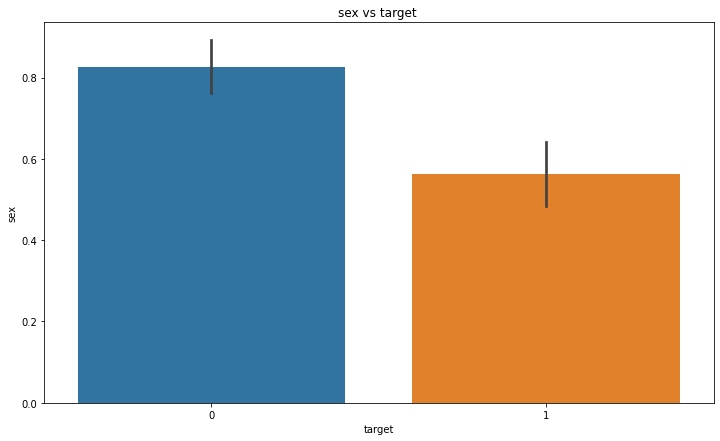

In [57]:
plt.figure(figsize=(12,7))
sns.barplot(x='target', y = 'sex', data= df)
plt.title('sex vs target ')
plt.show()


Text(0.5, 1.0, 'Count of each Target Class')

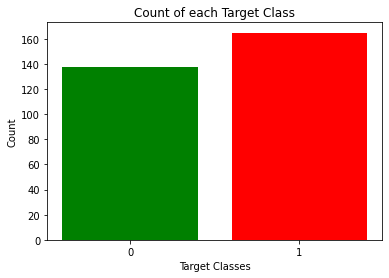

In [58]:
plt.bar(df['sex'].unique(), df['target'].value_counts(), color = ['red', 'green'])
plt.xticks([0, 1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class')

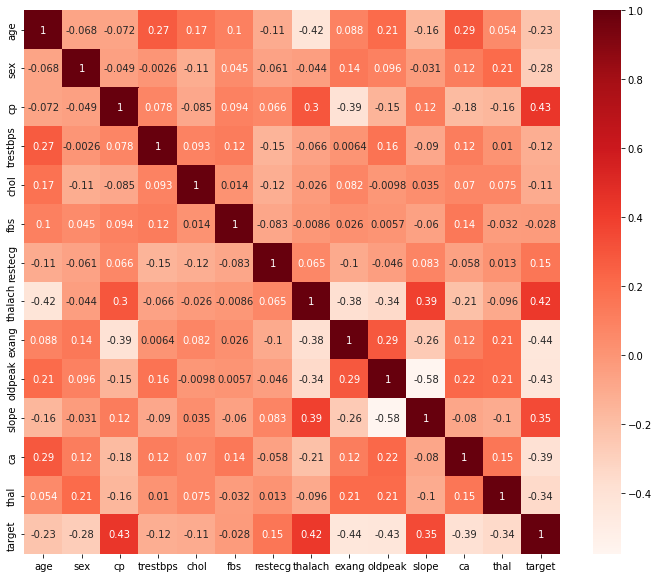

In [59]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [60]:
#Correlation with output variable
cor_target = abs(cor["target"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

target    1.0
Name: target, dtype: float64

In [61]:
df.dropna(inplace=True)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 289 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       289 non-null    float64
 1   sex       289 non-null    int64  
 2   cp        289 non-null    int64  
 3   trestbps  289 non-null    float64
 4   chol      289 non-null    float64
 5   fbs       289 non-null    int64  
 6   restecg   289 non-null    float64
 7   thalach   289 non-null    int64  
 8   exang     289 non-null    int64  
 9   oldpeak   289 non-null    float64
 10  slope     289 non-null    int64  
 11  ca        289 non-null    int64  
 12  thal      289 non-null    int64  
 13  target    289 non-null    int64  
dtypes: float64(5), int64(9)
memory usage: 33.9 KB


## Corelation Matrix

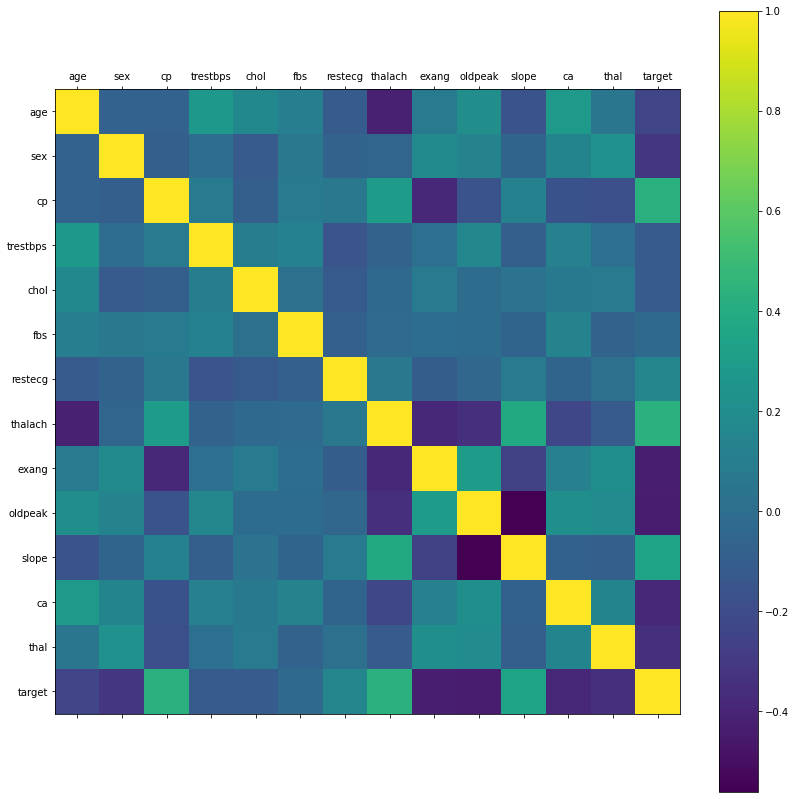

In [63]:
rcParams['figure.figsize'] = 20,14
plt.matshow(df.corr())
plt.yticks(np.arange(df.shape[1]) , df.columns)
plt.xticks(np.arange(df.shape[1]) , df.columns)
plt.colorbar()

##Histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7b97263c90>,
      dtype=object)

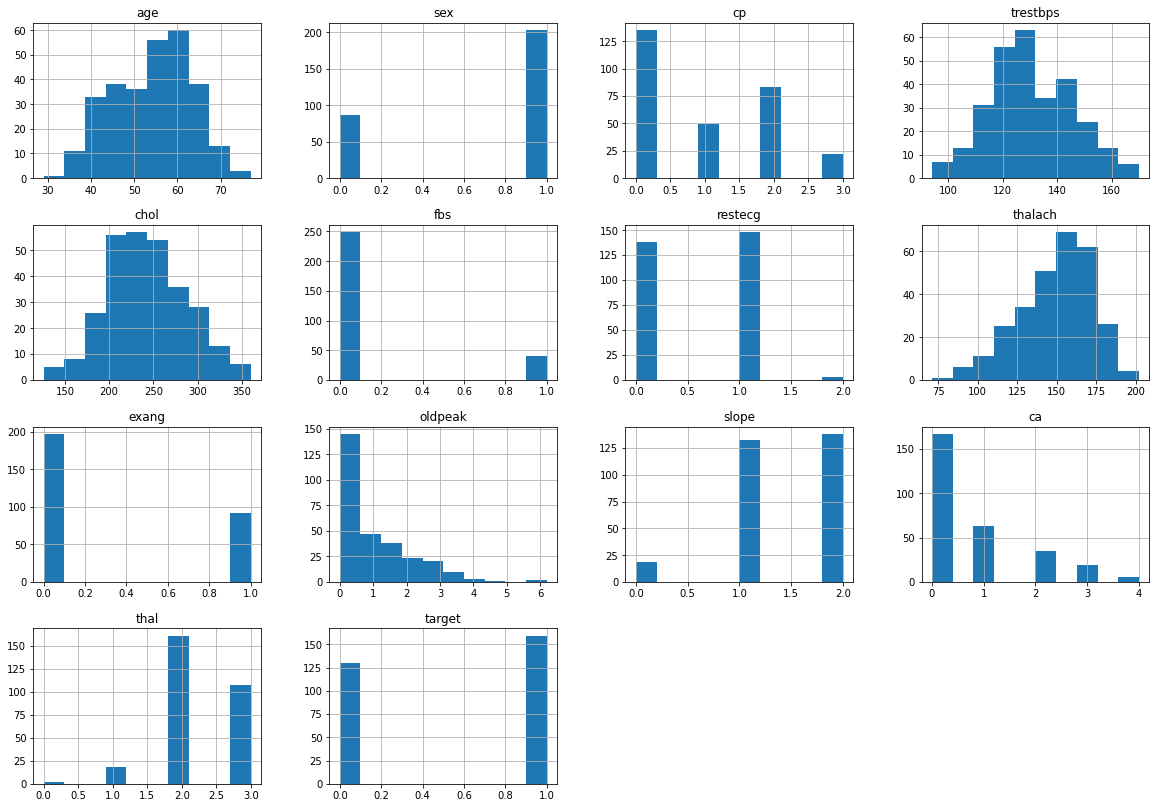

In [64]:
df.hist()

Text(0.5, 1.0, 'Count of each Target Class')

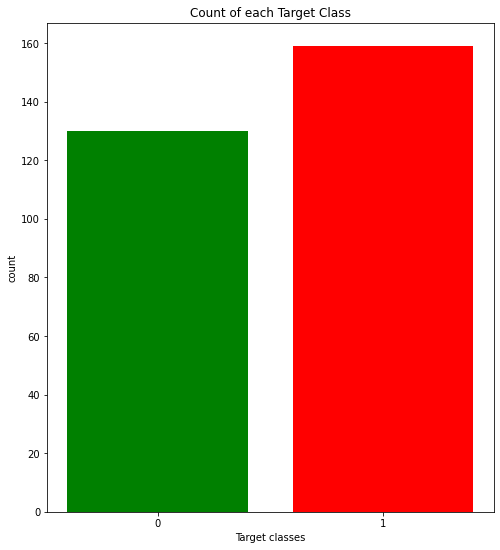

In [65]:
rcParams['figure.figsize']=8,9
plt.bar(df['target'].unique(),df['target'].value_counts() ,color = ['red', 'green'])
plt.xticks([0,1])
plt.xlabel('Target classes')
plt.ylabel('count')
plt.title('Count of each Target Class')

In [66]:
columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
df = pd.get_dummies(df,columns=columns)
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
standardScaler = StandardScaler()
df[columns_to_scale] = standardScaler.fit_transform(df[columns_to_scale])


##Train-Test Dataset

In [139]:
y = df['target']
X = df.drop(['target'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

# k-Nearest Neighbours algorithm

In [140]:
from sklearn.neighbors import KNeighborsClassifier

In [141]:
knn_scores = []
for k in range(1,21):
  knn_classifier = KNeighborsClassifier(n_neighbors = k)
  knn_classifier.fit(X_train,y_train)
  knn_scores.append(knn_classifier.score(X_test,y_test))
knn_scores  
  

[0.7241379310344828,
 0.7126436781609196,
 0.7816091954022989,
 0.7931034482758621,
 0.7816091954022989,
 0.8160919540229885,
 0.7816091954022989,
 0.7931034482758621,
 0.7816091954022989,
 0.7931034482758621,
 0.8045977011494253,
 0.8160919540229885,
 0.8160919540229885,
 0.7931034482758621,
 0.7931034482758621,
 0.7816091954022989,
 0.7816091954022989,
 0.7586206896551724,
 0.7931034482758621,
 0.7931034482758621]

In [142]:
pred = knn_classifier.predict(X_test)

In [143]:
from sklearn.metrics import classification_report , confusion_matrix
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))


[[29 12]
 [ 6 40]]
              precision    recall  f1-score   support

           0       0.83      0.71      0.76        41
           1       0.77      0.87      0.82        46

    accuracy                           0.79        87
   macro avg       0.80      0.79      0.79        87
weighted avg       0.80      0.79      0.79        87



Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

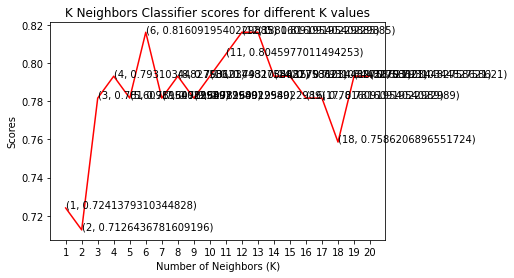

In [144]:
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

From the plot above, it is clear that the maximum score achieved was 0.87 for the 8 neighbors.

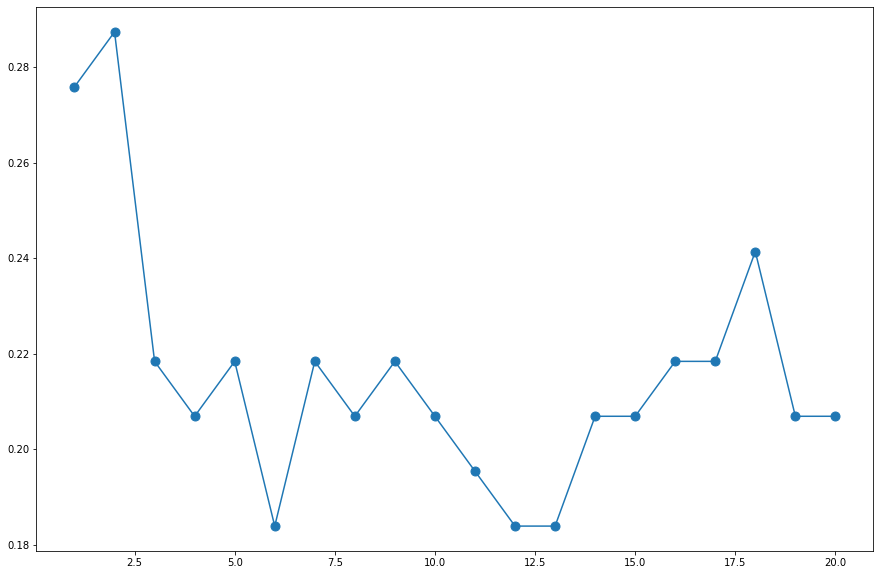

In [145]:
error_rate = []

for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    error_rate.append(np.mean(pred != y_test))

plt.figure(figsize=(15,10))
plt.plot(range(1,21),error_rate, marker='o', markersize=9)

In [147]:
from sklearn.model_selection import cross_val_score

knn_scores = []
k_scores = []
for k in range(1,21):
  knn_classifier = KNeighborsClassifier(n_neighbors = 6)
  scores = cross_val_score(knn_classifier, X, y, cv=5, scoring='accuracy')
  k_scores.append(scores.mean())
  knn_classifier.fit(X_train,y_train)
  knn_scores.append(knn_classifier.score(X_test,y_test))
knn_scores  
  
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
len(k_scores)
k_scores

[[29 12]
 [ 6 40]]
              precision    recall  f1-score   support

           0       0.83      0.71      0.76        41
           1       0.77      0.87      0.82        46

    accuracy                           0.79        87
   macro avg       0.80      0.79      0.79        87
weighted avg       0.80      0.79      0.79        87



[0.819903206291591,
 0.819903206291591,
 0.819903206291591,
 0.819903206291591,
 0.819903206291591,
 0.819903206291591,
 0.819903206291591,
 0.819903206291591,
 0.819903206291591,
 0.819903206291591,
 0.819903206291591,
 0.819903206291591,
 0.819903206291591,
 0.819903206291591,
 0.819903206291591,
 0.819903206291591,
 0.819903206291591,
 0.819903206291591,
 0.819903206291591,
 0.819903206291591]

From the plot above, it is clear that the minimum error achieved at the 6 neighbors.

# support vector machine hyperparameter tunning using gridsearchcv 

In [78]:
from sklearn.svm import SVC

In [79]:
model = SVC( )
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86        32
           1       0.76      1.00      0.87        26

    accuracy                           0.86        58
   macro avg       0.88      0.88      0.86        58
weighted avg       0.89      0.86      0.86        58



In [80]:

from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.574 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.587 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.587 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.565 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.565 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.830 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.826 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.804 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.674 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.783 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.574 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [81]:

# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

grid_predictions = grid.predict(X_test)
 
# print classification report
print(classification_report(y_test, grid_predictions))

{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
SVC(C=100, gamma=0.0001)
              precision    recall  f1-score   support

           0       1.00      0.75      0.86        32
           1       0.76      1.00      0.87        26

    accuracy                           0.86        58
   macro avg       0.88      0.88      0.86        58
weighted avg       0.89      0.86      0.86        58



In [82]:
svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    svc_classifier = SVC(kernel = kernels[i])
    svc_classifier.fit(X_train, y_train)
    svc_scores.append(svc_classifier.score(X_test, y_test))
    

In [109]:
svc_scores

[0.8448275862068966,
 0.8448275862068966,
 0.8620689655172413,
 0.8448275862068966]

Text(0.5, 1.0, 'Support Vector Classifier scores for different kernels')

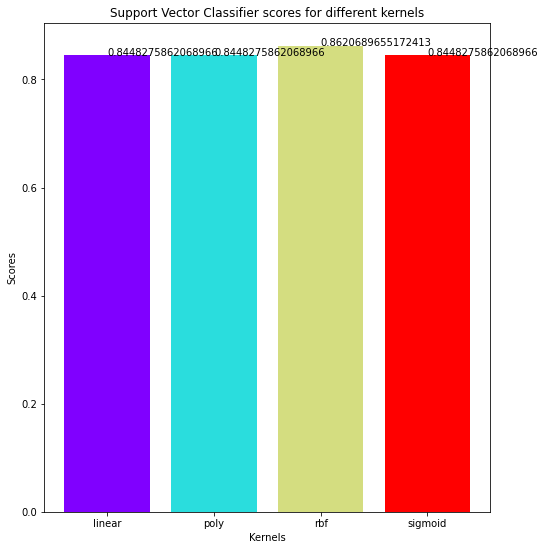

In [84]:
colors = rainbow(np.linspace(0, 1, len(kernels)))
plt.bar(kernels, svc_scores, color = colors)
for i in range(len(kernels)):
    plt.text(i, svc_scores[i], svc_scores[i])
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('Support Vector Classifier scores for different kernels')

## poly kernal gives better result scores from above kernals which is 78.57

In [87]:
from sklearn import tree

classifier= tree.DecisionTreeClassifier()  
classifier.fit(X_train, y_train)
  
classifier.score(X_train, y_train)
predictions = classifier.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.87      0.62      0.73        32
           1       0.66      0.88      0.75        26

    accuracy                           0.74        58
   macro avg       0.76      0.75      0.74        58
weighted avg       0.77      0.74      0.74        58



In [149]:
dt_scores = []
for i in range(1, len(X.columns) + 1):
    model = tree.DecisionTreeClassifier(max_features = i, random_state = 0)
    model.fit(X_train, y_train)
    predictions = classifier.predict(X_test)
    dt_scores.append(model.score(X_train,y_train))
    dt_scores
    #print(classification_report(y_test, predictions))

In [151]:
# plt.plot([i for i in range(1, len(X.columns) + 1)], dt_scores, color = 'green')
# for i in range(1, len(X.columns) + 1):
#     plt.text(i, dt_scores[i-1], (i, dt_scores[i-1]))
# plt.xticks([i for i in range(1, len(X.columns) + 1)])
# plt.xlabel('Max features')
# plt.ylabel('Scores')
# plt.title('Decision Tree Classifier scores for different number of maximum features')

In [90]:
model = RandomForestClassifier(max_depth=5)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [91]:
estimator = model.estimators_[1]
feature_names = [i for i in X_train.columns]

y_train_str = y_train.astype('str')
y_train_str[y_train_str == '0'] = 'no disease'
y_train_str[y_train_str == '1'] = 'disease'
y_train_str = y_train_str.values

In [150]:

# export_graphviz(estimator, out_file='tree.dot', 
#                 feature_names = feature_names,
#                 class_names = y_train_str,
#                 rounded = True, proportion = True, 
#                 label='root',
#                 precision = 2, filled = True)

# from subprocess import call
# call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# from IPython.display import Image
# Image(filename = 'tree.png')

In [94]:
y_predict = model.predict(X_test)
y_pred_quant = model.predict_proba(X_test)[:, 1]
y_pred_bin = model.predict(X_test)

In [95]:
confusion_matrix = confusion_matrix(y_test, y_pred_bin)
confusion_matrix

array([[25,  7],
       [ 0, 26]])

In [100]:
model.score(X_test, y_test)

0.8793103448275862

In [ ]:
Testing knn,svc,desicion-tree 

Testing knn,svc,desicion-tree we get the best results from using random forest algorithm which is 87.93 percent